In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.model_selection import train_test_split

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\python\data\creditcard\creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [7]:
print('Giao dịch hợp lệ: ', round(df['Class'].value_counts()[0]/len(df) * 100,2),'%')
print('Giao dịch gian lận: ', round(df['Class'].value_counts()[1]/len(df) * 100,2),'%')

Giao dịch hợp lệ:  99.83 %
Giao dịch gian lận:  0.17 %


Số giao dịch gian lận

In [7]:
df['Class'].value_counts()[1]

492

Text(0.5, 1.0, 'Phân phối số lượng giao dịch \n (0: Hợp lệ || 1: Gian lận)')

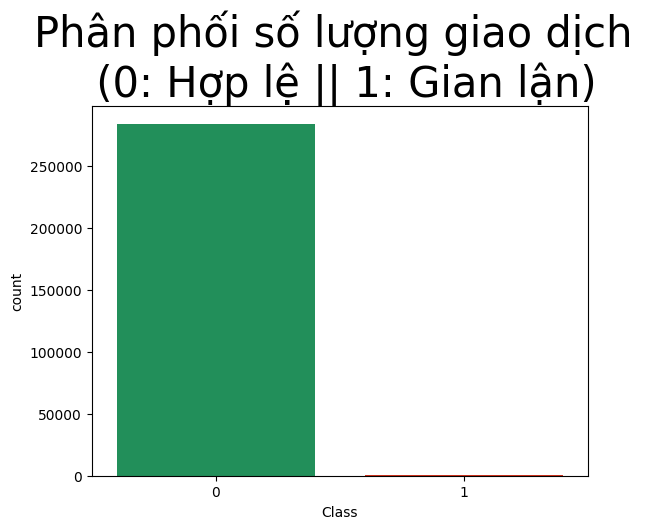

In [8]:
colors = ["#10A15A", "#F01C00"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Phân phối số lượng giao dịch \n (0: Hợp lệ || 1: Gian lận)', fontsize=30)

Chuẩn hóa data

Robust Scaler: sử dụng phạm vi tứ phân vị -> mạnh mẽ đối với outlier

ko loại bỏ hoàn toàn outlier

ko làm thay đổi hình dạng phân bố của 1 thuộc tính

công thức: (gtri hiện tại - gtri tại điểm trung vị)/(gtri tại pvi 75 - gtri tại pvi 25)

In [21]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [22]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df[['scaled_amount', 'scaled_time']]

,scaled_amount,scaled_time
0,1.783274,-0.994983
1,-0.269825,-0.994983
2,4.983721,-0.994972
3,1.418291,-0.994972
4,0.670579,-0.994960
...,...,...
284802,-0.296653,1.034951
284803,0.038986,1.034963
284804,0.641096,1.034975
284805,-0.167680,1.034975


Chia data từ data gốc (để test và đánh giá)

StratifiedKFold:

- Dữ liệu không cân bằng: Khi làm việc với dữ liệu không cân bằng, đặc biệt là khi phân phối của các lớp là quan trọng, StratifiedKFold sẽ là lựa chọn tốt để đảm bảo rằng các fold có phân phối lớp tương tự nhau.
- Phân loại đa lớp: Khi làm việc với bài toán phân loại đa lớp, StratifiedKFold sẽ giữ cho mỗi fold có phân phối các lớp tương tự nhau, giúp đánh giá hiệu suất mô hình một cách chính xác hơn.

KFold:

- Dữ liệu cân bằng: Khi dữ liệu có phân phối đồng đều giữa các lớp, KFold có thể được sử dụng một cách hiệu quả để chia dữ liệu một cách ngẫu nhiên thành các fold.
- Mô hình hồi quy: Trong một số trường hợp, đặc biệt là khi bạn đang làm việc với các mô hình hồi quy, KFold có thể đủ để đánh giá hiệu suất của mô hình mà không cần sự chính xác cao trong việc chia dữ liệu.

StratifiedKFold:

- Sử dụng StratifiedKFold khi bạn làm việc với tập dữ liệu không cân bằng, tức là các lớp (các nhóm) trong dữ liệu có phân phối không đồng đều. Trong trường hợp này, StratifiedKFold đảm bảo rằng phân phối của các lớp trong tập huấn luyện và tập kiểm tra giữ nguyên tính cân bằng.

- Đặc biệt hữu ích cho bài toán phân loại (classification) khi bạn muốn đảm bảo rằng mô hình được đánh giá trên các tập kiểm tra đại diện cho tất cả các lớp.

KFold:

- Sử dụng KFold khi bạn làm việc với tập dữ liệu có phân phối lớp cân bằng hoặc không có vấn đề về cân bằng lớp.

- Thích hợp khi bạn cần thực hiện kiểm tra hiệu suất trên tập dữ liệu mà không có yêu cầu đặc biệt về tính cân bằng của các lớp.

trộn data của tập X rồi chia ra 5 phần

In [23]:
from sklearn.model_selection import StratifiedKFold #phân chia cho việc kiểm tra và đánh giá mô hình

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False) #chia tập thành 5 phần, shuffle xáo trộn data

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    print(original_Xtrain.shape)

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
(227845, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
(227845, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
(227846, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
(227846, 30)
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
(227846, 30)


In [24]:
X.shape

(284807, 30)

In [25]:
#80% tập train
original_Xtrain.shape

(227846, 30)

In [26]:
print(train_index.shape)
print(test_index.shape)

(227846,)
(56961,)


In [27]:
# Chuyển Dataframe thành ma trận numpy
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#tính toán số lượng các nhãn (labels) duy nhất và số lần xuất hiện của mỗi nhãn trong tập huấn luyện original_ytrain
#train_unique_label chứa các nhãn duy nhất và train_counts_label chứa số lần xuất hiện tương ứng của các nhãn.
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)

#test_unique_label chứa các nhãn duy nhất và test_counts_label chứa số lần xuất hiện tương ứng của các nhãn.
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [28]:
original_Xtrain.shape

(227846, 30)

Tạo bộ data con

Lấy random mẫu

In [29]:
#Trộn dữ liệu trước khi tạo bộ dữ liệu con
df = df.sample(frac=1) #trộn data random

#Số giao dịch gian lận là 492 giao dịch
fraud_df = df.loc[df['Class'] == 1] #lấy ra 429 giao dịch gian lận
non_fraud_df = df.loc[df['Class'] == 0][:492] #lấy ra 492 giao dịch ko gian lận đầu tiên

normal_distributed_df = pd.concat([fraud_df, non_fraud_df]) #kết hợp 2 dataframe trên thành 1 -> 984 row

#Trộn bộ dữ liệu con vừa tạo
new_df = normal_distributed_df.sample(frac=1, random_state=42)

#new_df
# new_df.head()
print(f'Kích thước của Dataframe sau khi tạo bộ dữ liệu con: {new_df.shape}')
print(f'Kích thước của Dataframe giao dịch gian lận sau khi tạo bộ dữ liệu con: {fraud_df.shape}')
print(f'Kích thước của Dataframe giao dịch hợp lệ sau khi tạo bộ dữ liệu con: {non_fraud_df.shape}')

Kích thước của Dataframe sau khi tạo bộ dữ liệu con: (984, 31)
Kích thước của Dataframe giao dịch gian lận sau khi tạo bộ dữ liệu con: (492, 31)
Kích thước của Dataframe giao dịch hợp lệ sau khi tạo bộ dữ liệu con: (492, 31)


Phân phối số lượng giao dịch trong bộ dữ liệu con vừa tạo
Class
0    0.5
1    0.5
Name: count, dtype: float64


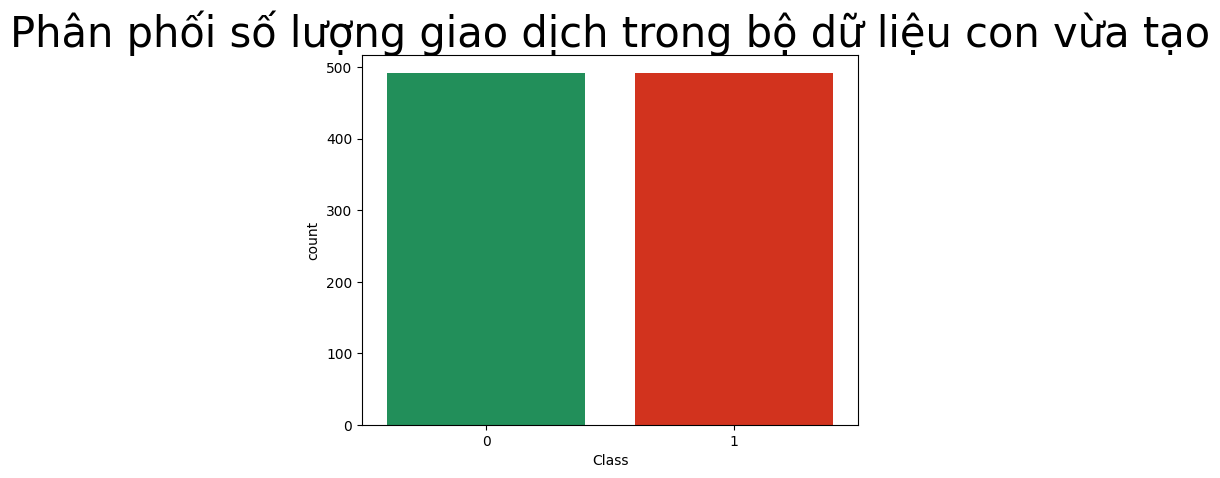

In [30]:
print('Phân phối số lượng giao dịch trong bộ dữ liệu con vừa tạo')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Phân phối số lượng giao dịch trong bộ dữ liệu con vừa tạo', fontsize=30)
plt.show()

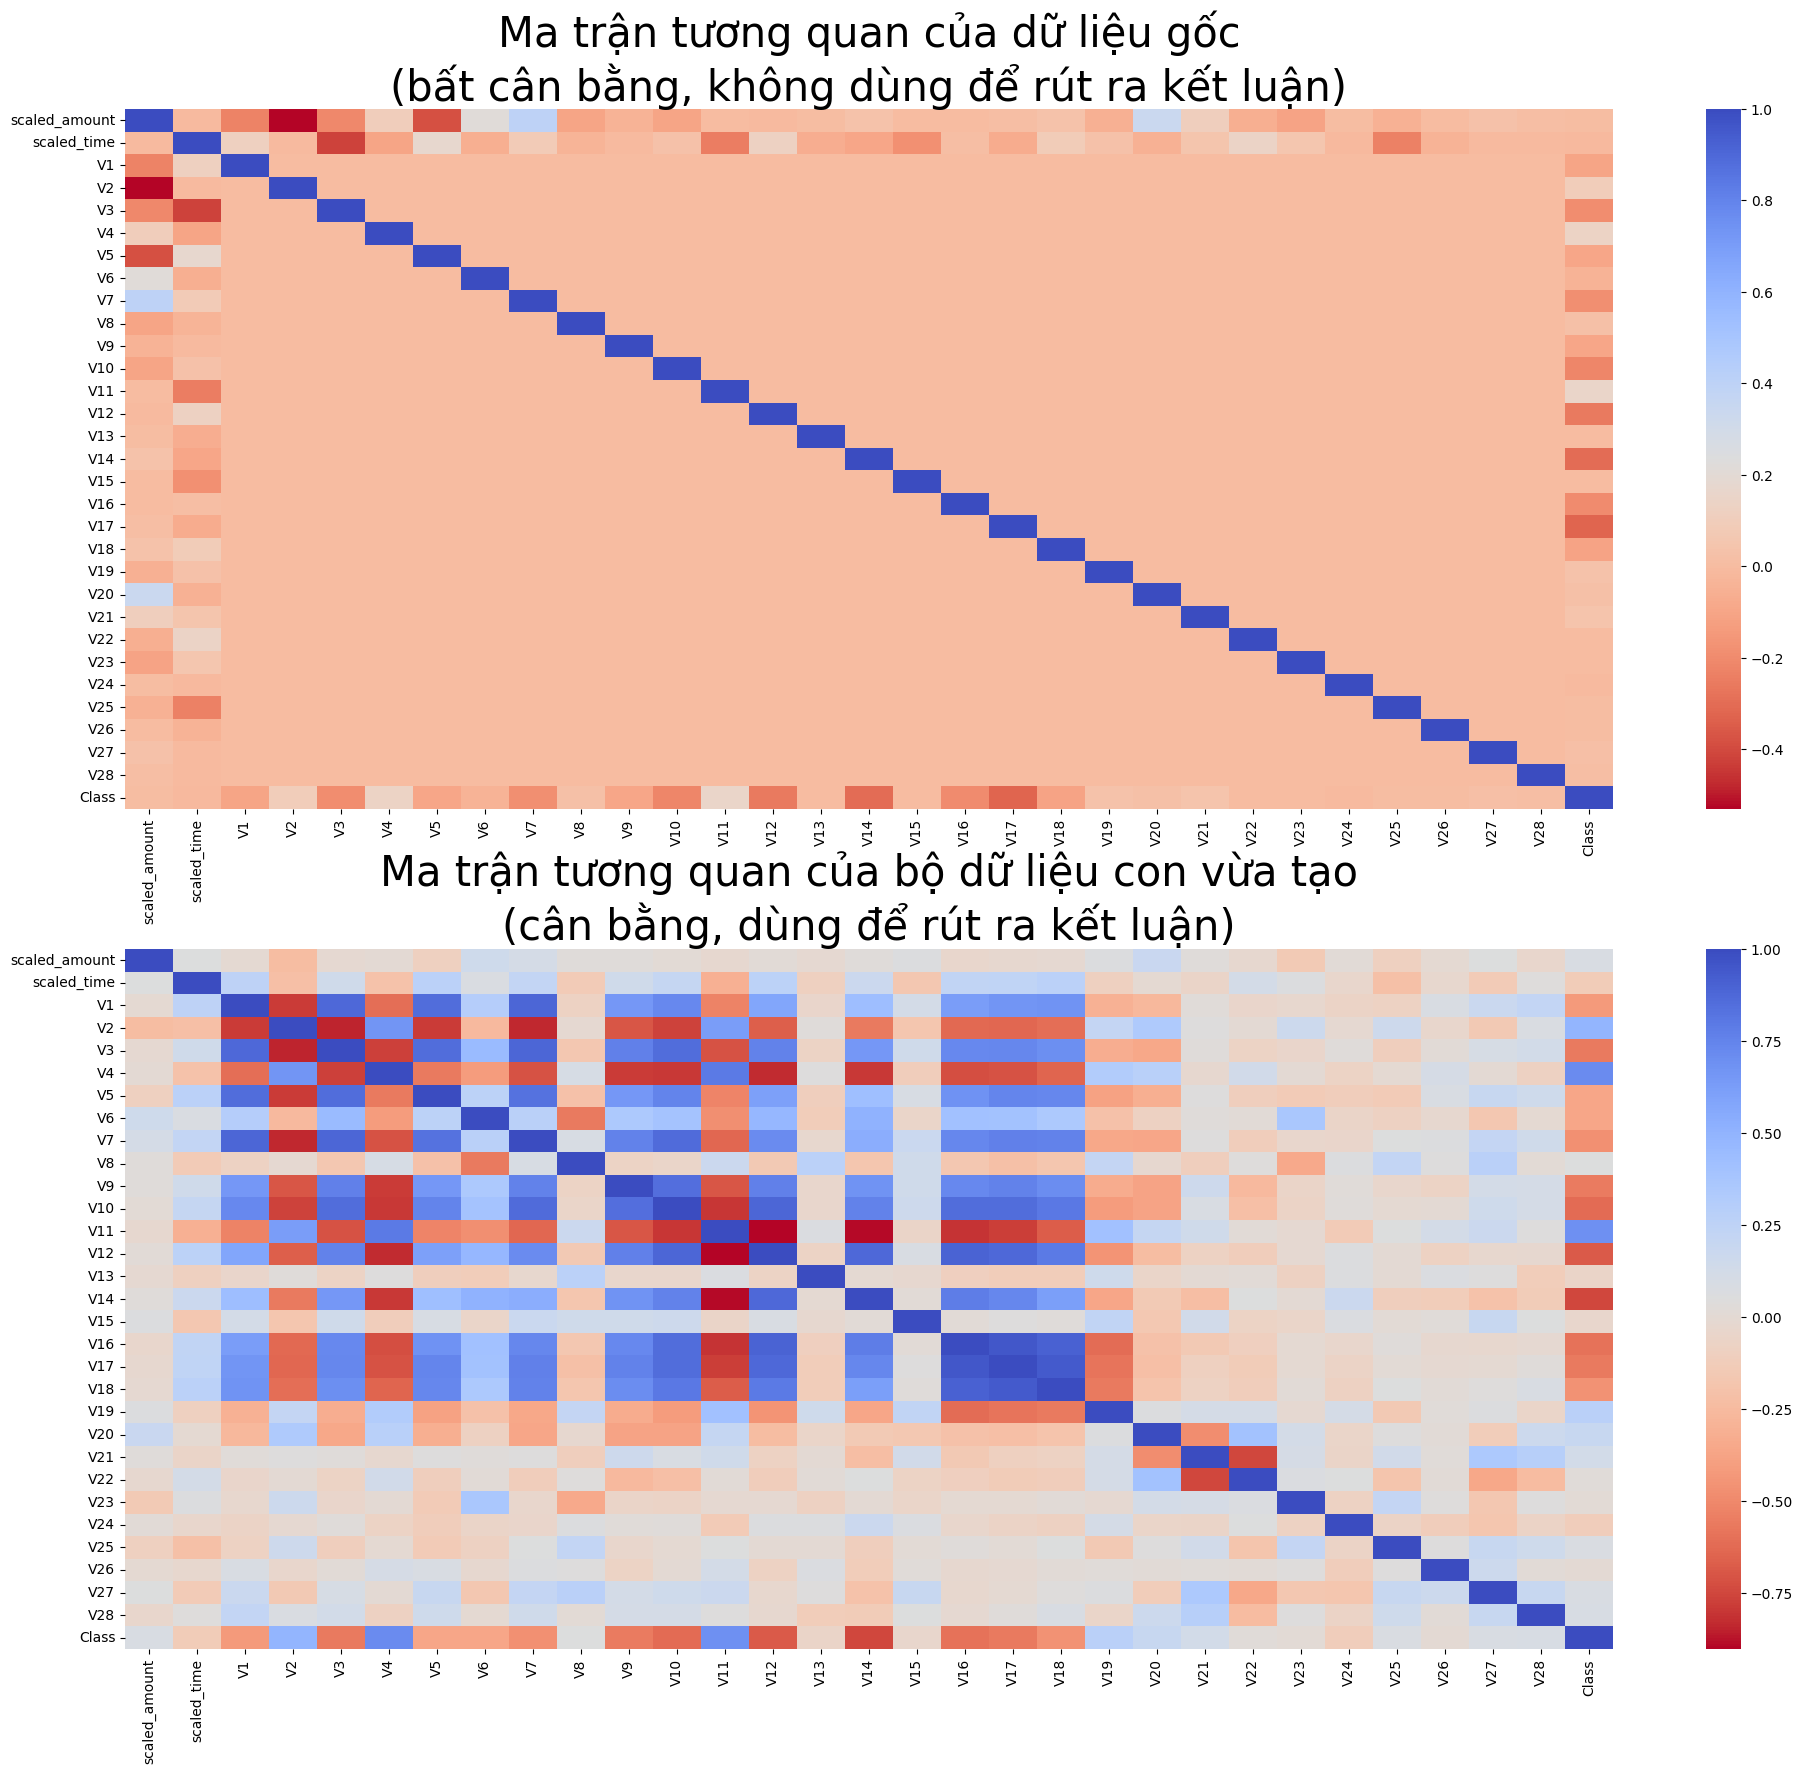

In [31]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

#Dữ liệu gốc
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Ma trận tương quan của dữ liệu gốc\n(bất cân bằng, không dùng để rút ra kết luận)", fontsize=30)

#Bộ dữ liệu con vừa tạo
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Ma trận tương quan của bộ dữ liệu con vừa tạo\n(cân bằng, dùng để rút ra kết luận)', fontsize=30)
plt.show()

v14 12 10 có tương quan âm cao nên chọn ra để loại bỏ outlier

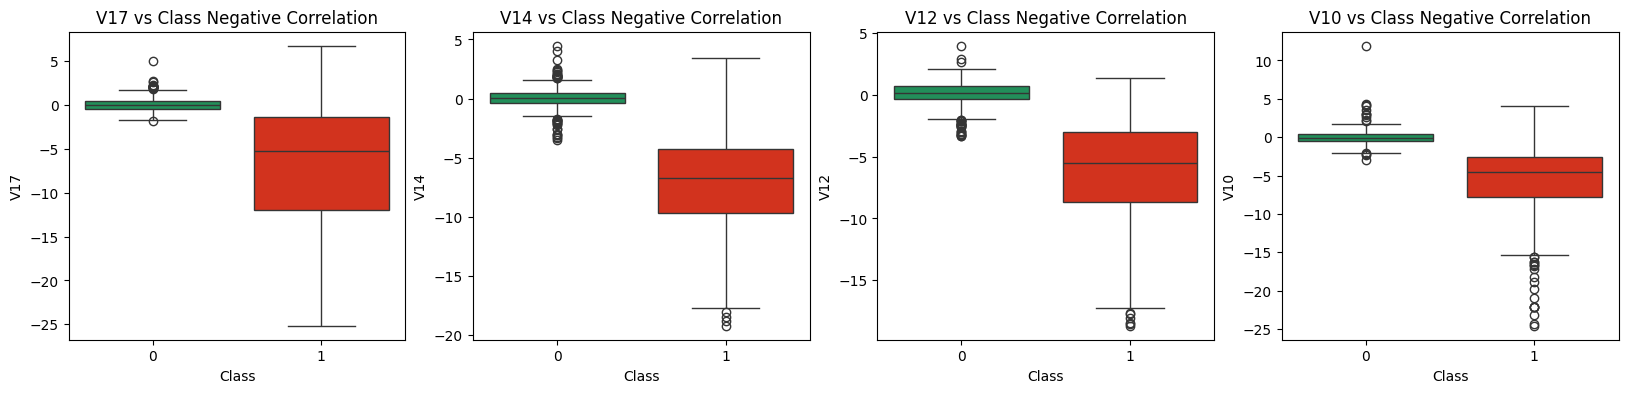

In [32]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

#Tương quan âm (Giá trị càng nhỏ thì khả năng là giao dịch gian lận càng lớn
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

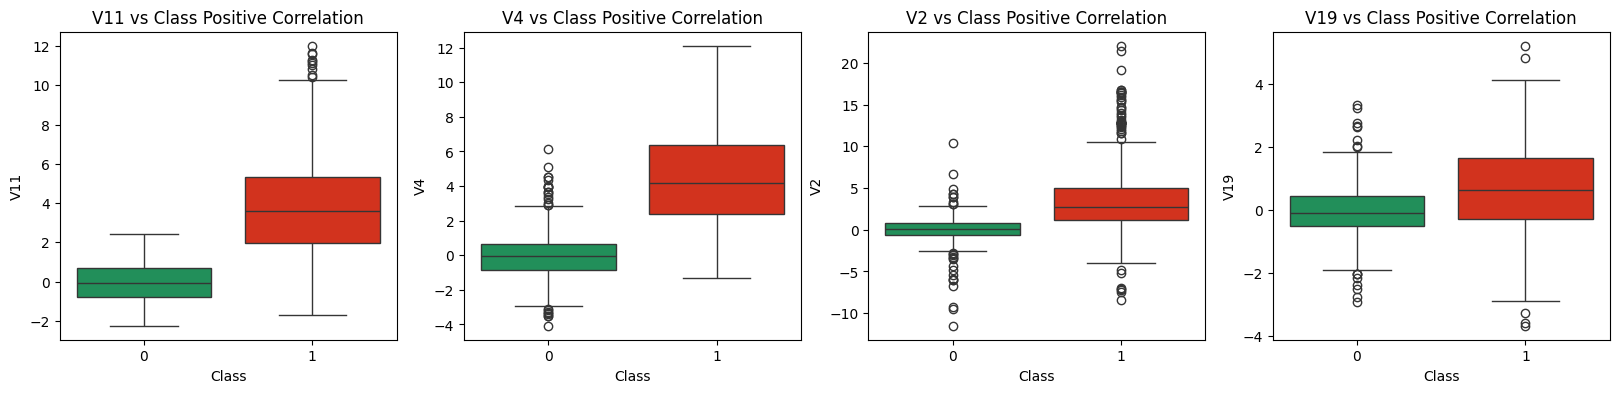

In [33]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Tương quan dương (Giá trị càng lớn thì khả năng là giao dịch gian lận càng cao)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Phát hiện những giá trị bất thường của tương quan âm

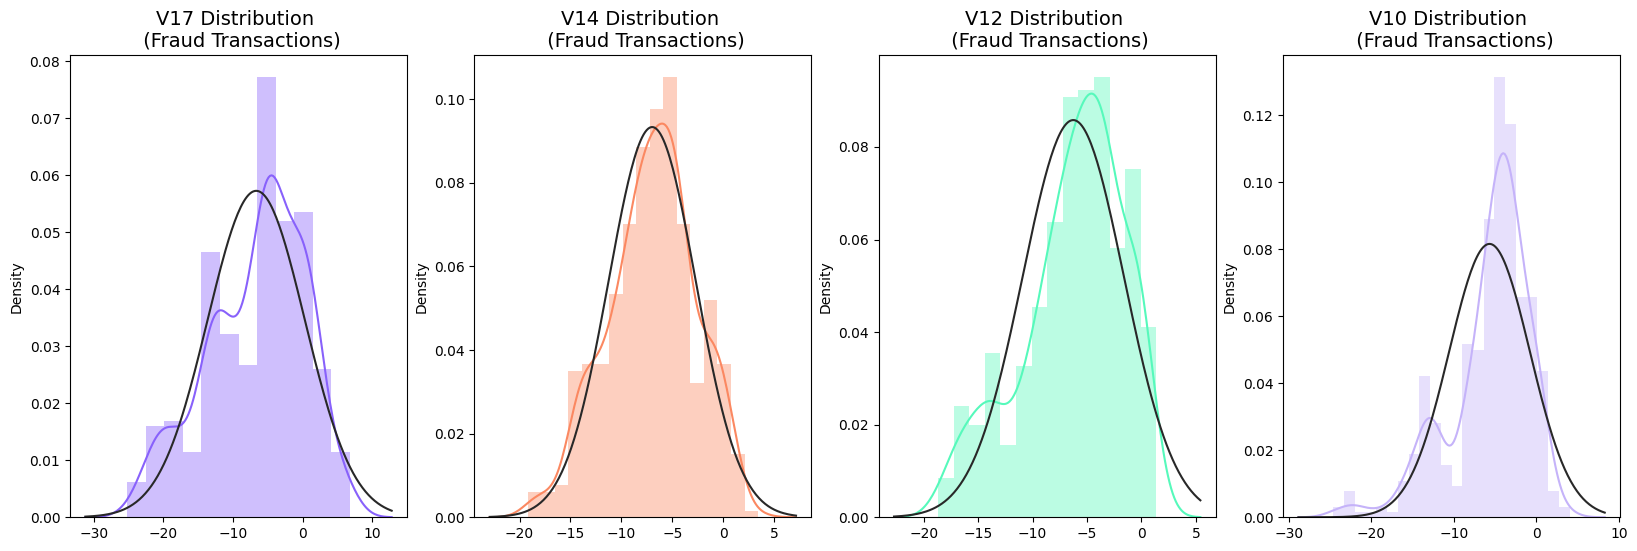

In [34]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6)) # vẽ 3 biểu đồ phân phối

v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values # lấy giao dịch gian lận của v14
sns.distplot(v17_fraud_dist,ax=ax1, fit=norm, color='#8861FB')
ax1.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values # lấy giao dịch gian lận của v14
sns.distplot(v14_fraud_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax3, fit=norm, color='#56F9BB')
ax3.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

V14 có phân phối density (mật độ) chuẩn

Loại bỏ giá trị outlier bằng cách tính IQR

- Loại bỏ giá trị outlier đối với các thuộc tính có độ tương quan cao đối với thuộc tính Class để nâng cao độ chính xác của model khi train
- Loại bỏ nhiều sẽ bị mất mát dữ liệu (1 nửa nếu bỏ hết)

In [35]:
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,1.125470,0.029250,-2.409423,1.796170,-3.493914,2.258193,-1.620817,-0.775925,-2.829497,0.321383,...,0.160350,0.352196,-0.012771,-0.047415,-0.037310,-0.008915,0.052811,0.081505,0.029835,0.500000
std,3.259764,0.556705,5.553192,3.722979,6.238821,3.211430,4.201010,1.718579,5.849365,4.856984,...,1.111404,2.789555,1.161836,1.408543,0.558342,0.701056,0.479635,1.046563,0.509982,0.500254
min,-0.307413,-0.994185,-30.552380,-11.509078,-31.103685,-4.072605,-22.105532,-9.312814,-43.557242,-41.044261,...,-7.780783,-22.797604,-8.887017,-25.356744,-2.209605,-6.035054,-1.332670,-7.263482,-8.307955,0.000000
25%,-0.289387,-0.441626,-2.880824,-0.130783,-5.113334,-0.134153,-1.798981,-1.582428,-3.105154,-0.231624,...,-0.207700,-0.171152,-0.538358,-0.239023,-0.395114,-0.342081,-0.268956,-0.067090,-0.054705,0.000000
50%,-0.041501,-0.071118,-0.769684,0.944105,-1.369045,1.279566,-0.492980,-0.715604,-0.670888,0.152321,...,0.004804,0.131546,-0.013541,-0.029990,0.020524,0.032791,-0.001175,0.053354,0.043046,0.500000
75%,1.089779,0.576126,1.028273,2.830832,0.405215,4.250632,0.386278,-0.022256,0.262230,0.892040,...,0.409725,0.652748,0.521647,0.188007,0.379995,0.370033,0.360384,0.453731,0.219111,1.000000
max,29.398030,1.031203,2.331648,22.057729,4.226108,12.114672,14.306890,6.474115,5.802537,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.766768,2.208209,2.745261,4.610936,1.779364,1.000000


In [36]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75) # tính phân vị 25% và 75% của v14 trong tập new_df 984 row
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
# tính giới hạn dưới (lấy phân vị 25 - iqr * 1.5), giới hạn trên (lấy phân vị 75 - iqr * 1.5)
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper] #list chứa các giá trị outlier
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers))) # số trường hợp gian lận của v14
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.0475965708216, -18.6837146333443, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 974
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.6496281595399, -16.601196

Giảm số chiều

In [37]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# t-SNE
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# Truncated SVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 1.5e+01 s
PCA took 0.00048 s
Truncated SVD took 0.067 s


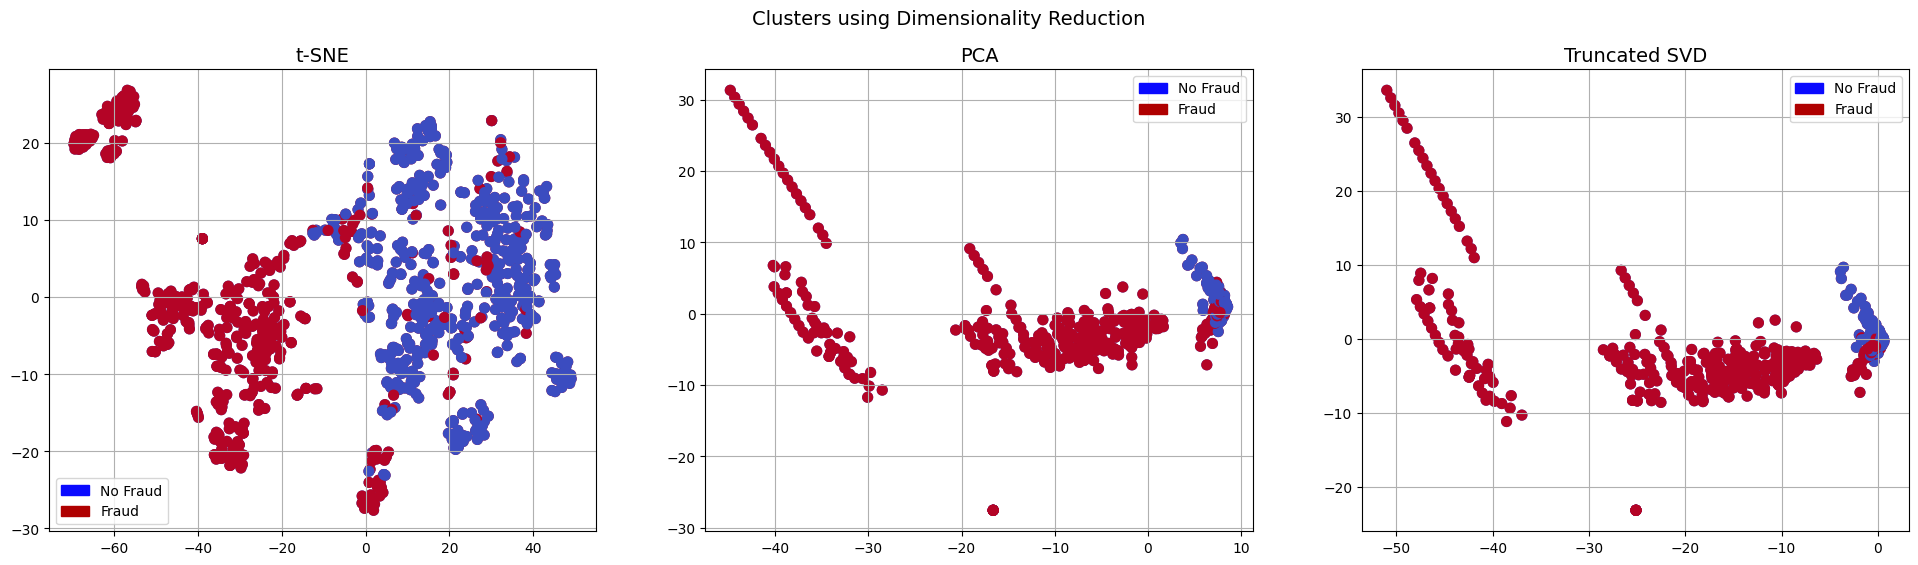

In [38]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Train Model

In [39]:
new_df.shape

(946, 31)

In [40]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dữ liệu của X và y bị mất đi do trừ đi số lượng giá trị outlier

In [42]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

756
190
756
190


In [43]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
}

Kiểm định chéo sau khi train

cross val dùng x y train

In [44]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    acc = classifier.score(X_train, y_train)
    print("Accuracy: ", classifier.__class__.__name__, "có Accuracy: ", round(acc, 2) * 100, "%")

    training_score = cross_val_score(classifier, X_train, y_train, cv=5) #chia tập thành 5 phần và kiểm định chéo

    #phần trăm độ chính xác trung bình của các lần kiểm tra chéo.
    print("Cross Validation Score: ", classifier.__class__.__name__, "có training score", round(training_score.mean() * 100, 2), "% accuracy score")

    # print()

    y_pred = classifier.predict(X_test)
    print("Classification Report for", classifier.__class__.__name__)
    print(classification_report(y_test, y_pred))
    print()

Accuracy:  LogisticRegression có Accuracy:  96.0 %
Cross Validation Score:  LogisticRegression có training score 93.52 % accuracy score
Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        91
           1       1.00      0.87      0.93        99

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.94      0.93      0.93       190


Accuracy:  KNeighborsClassifier có Accuracy:  96.0 %
Cross Validation Score:  KNeighborsClassifier có training score 93.79 % accuracy score
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        91
           1       1.00      0.83      0.91        99

    accuracy                           0.91       190
   macro avg       0.92      0.91      0.91       190
weighted avg       0.92      0.9

Cross validation đánh giá hiệu suất của mô hình trên nhiều tập data khác nhau chưa được học để giảm overfitting

**Accuracy trước khi tìm siêu tham số: lần lượt từ cao đến thấp là Logistic Regression, KNN, SVM**

**Cross Validation Score đánh giá hiệu suất của các thuật toán trước khi tìm siêu tham số: lần lượt từ cao đến thấp là Logistic Regression, KNN, SVM**

Dùng Grid tìm siêu tham số

In [45]:
#grid search cv
# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Logistic Regression best estimator
log_reg = grid_log_reg.best_estimator_
print(f'Siêu tham số của {log_reg}')
# print(classification_report())
print(f'Logistic Regression có accuracy sau khi tìm siêu tham số: {round(grid_log_reg.score(X_train,y_train), 2) * 100}%')
print()

# KNN
knears_params = {"n_neighbors": list(range(2,10,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print(f'Siêu tham số của {knears_neighbors}')
print(f'KNN có accuracy sau khi tìm siêu tham số: {round(grid_knears.score(X_train,y_train), 2) * 100}%')
print()
# print(grid_knears.score(X_train, y_train))

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
print(f'Siêu tham số của {svc}')
print(f'SVM có accuracy sau khi tìm siêu tham số: {round(grid_svc.score(X_train,y_train), 2) * 100}%')
# print(grid_svc.score(X_train, y_train))



Siêu tham số của LogisticRegression(C=0.1)
Logistic Regression có accuracy sau khi tìm siêu tham số: 95.0%

Siêu tham số của KNeighborsClassifier(n_neighbors=3)
KNN có accuracy sau khi tìm siêu tham số: 97.0%

Siêu tham số của SVC(C=0.9, kernel='linear')
SVM có accuracy sau khi tìm siêu tham số: 96.0%


c=1 96%

n_neightbor = 2 94%

c = 0.5 96%

**Accuracy sau khi tìm ra siêu tham số: lần lượt từ cao đến thấp là KNN, SVM, Logistic Regression**

Đánh giá sau khi tìm ra siêu tham số và kiểm định chéo

In [46]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.05%
Knears Neighbors Cross Validation Score 94.98%
Support Vector Classifier Cross Validation Score 94.05%


**Cross Validation Score sau khi tìm ra siêu tham số: lần lượt từ cao đến thấp là Logistic Regression, SVM, KNN**

In [47]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    print('undersample_Xtrain: ', undersample_Xtrain.shape)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
#Phân phối NearMiss (Chỉ để xem cách nó phân phối nhãn, chúng tôi sẽ không sử dụng các biến này)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 52869  53317  54753 ... 284804 284805 284806] Test: [    0     1     2 ... 56967 56968 56969]
undersample_Xtrain:  (227845, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 52869  53317  54753 ... 113923 113924 113925]
undersample_Xtrain:  (227845, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [110272 111259 113926 ... 170911 171507 171608]
undersample_Xtrain:  (227846, 30)
Train: [     0      1      2 ... 284804 284805 284806] Test: [170882 170883 170884 ... 228620 228776 229036]
undersample_Xtrain:  (227846, 30)
Train: [     0      1      2 ... 228620 228776 229036] Test: [227843 227844 227845 ... 284804 284805 284806]
undersample_Xtrain:  (227846, 30)
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [48]:
print(undersample_accuracy)
print(undersample_precision)
print(undersample_recall)
print(undersample_f1)
print(undersample_auc)


[0.7786701777485188, 0.7530996949680704, 0.8134257938510829, 0.8532774473874783, 0.881037547455507]
[0.002512299801109599, 0.0016556291390728477, 0.0008830455259026688, 0.002898056597340607, 0.0004589261128958238]
[0.16901408450704225, 0.2608695652173913, 0.17307692307692307, 0.16666666666666666, 0.10344827586206896]
[0.004951005673027334, 0.003290375651220181, 0.001757126122608356, 0.005697050938337802, 0.0009137983551629607]
[0.47962679218748255, 0.5111600573339704, 0.47467915622396367, 0.5190119573903418, 0.47998500749625184]


In [49]:
undersample_X.shape

(284807, 30)

In [50]:
X_nearmiss.shape

(984, 30)

Learning Curves

train_score = accuracy

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Logistic Regression Learning Curve
# ylim: xác định giới hạn trục y, cv: xác định phương pháp chia và kiểm định mẫu
# n_jobs: xác định số việc (estimator), train_sizes: xác định kích thước tập data để vẽ learning curve
# mảng numpy được tạo ra từ 0,1 đến 1,0 với 5 điểm tương ứng với kích thước tập dữ liệu
# huấn luyện từ 10% đến 100% của toàn bộ tập dữ liệu.
def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # thư viện learning_curve của sklearn
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # train_sizes: kích thước mảng train
    # train_scores_mean - train_scores_std: giá trị dưới của vùng mờ
    # train_scores_mean + train_scores_std: giá trị trên của vùng mờ
    # alpha: độ mờ từng vùng
    # color: màu đại diện cho vùng mờ
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124") #màu cam
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff") #màu xanh
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Knears Neighbors Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best") # chọn vị trí để chú thích là vị trí không đụng vào biểu đồ

    # Support Vector Classifier Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Bin\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

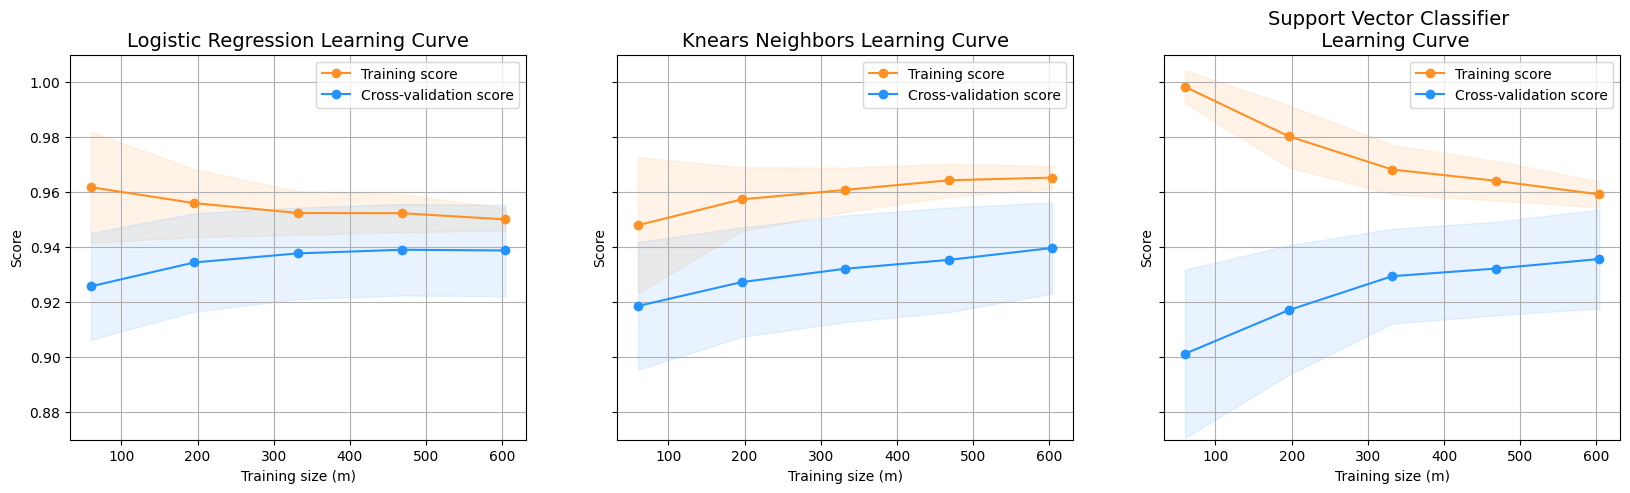

In [52]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
# giới hạn ylim = (0.87, 1.01): trong khoảng từ
plot_learning_curve(log_reg, knears_neighbors, svc, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=3)

ROC Curve

ROC curve: Receiver operating curve: xác định là có tín hiệu hay chỉ là do nhiễu
Có 2 tham số: True Positive Rate, False Positive Rate

In [53]:
# method: phương pháp predict: hàm quyết định: việc quyết định xếp loại 1 điểm data vào 1 trong các lớp
# Hàm quyết định là một hàm được sử dụng để tính toán một giá trị đại diện cho khoảng cách của điểm dữ liệu đó đến ranh giới phân loại

# Trong Logistic Regression, hàm sigmoid được sử dụng làm hàm quyết định để đưa ra xác suất xếp loại vào một trong hai lớp
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
# Trong SVMs, hàm quyết định tính toán khoảng cách từ điểm dữ liệu đến siêu phẳng phân chia hai lớp.
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

AUC (Area Under the Curve): diện tích dưới đường cong
- Dùng để đánh giá và so sánh hiệu suất giữa các mô hình phân loại khác nhau
- AUC càng gần 1 thì mô hình càng tốt trong việc phân loại các lớp, trong khi AUC gần 0.5 chỉ ra rằng mô hình không có hiệu suất phân loại tốt hơn so với dự đoán ngẫu nhiên.

In [54]:
print(f'Logistic Regression: {round(roc_auc_score(y_train, log_reg_pred), 2) * 100}%')
print(f'KNears Neighbors: {round(roc_auc_score(y_train, knears_pred), 2) * 100}%')
print(f'Support Vector Classifier: {round(roc_auc_score(y_train, svc_pred), 2) * 100}%')

Logistic Regression: 98.0%
KNears Neighbors: 95.0%
Support Vector Classifier: 97.0%


AUC lần lượt cao đến thấp: LT, SVM, KNN

Biểu diễn ROC curve
- Biểu diễn tỷ lệ giữa tỷ lệ các trường hợp dương thực sự được phát hiện chính xác (true positive rate, TPR) và tỷ lệ các trường hợp âm giả mạo bị phát hiện nhầm (false positive rate, FPR) tại các ngưỡng quyết định khác nhau.
- Đường cong ROC càng gần với góc trên bên trái của đồ thị (có diện tích dưới đường cong càng lớn) thì mô hình càng tốt và ngược lại

dự đoán dựa trên tập log_reg_pred <=> tập y_train

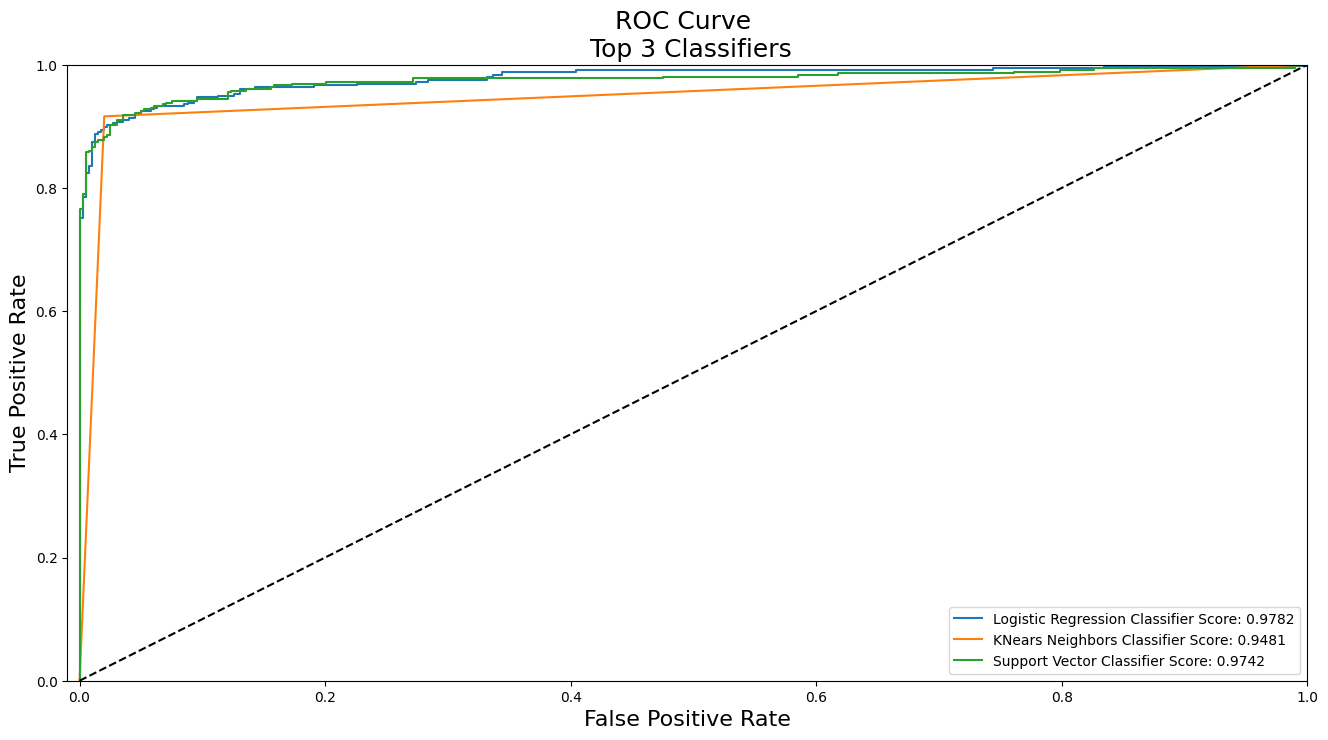

In [55]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr)
plt.show()

Theo ROC thì mô hình LT, SVM, KNN
- Đánh giá trường hợp TP
- FP

In [56]:
from sklearn.metrics import precision_recall_curve
# precision là mảng chứa giá trị precision tương ứng với các ngưỡng quyết định khác nhau.
# recall là mảng chứa giá trị recall tương ứng với các ngưỡng quyết định khác nhau.
# threshold là mảng chứa các ngưỡng quyết định được sử dụng để tính toán precision và recall.
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

Tính toán các giá trị đánh giá giữa y_train: giá trị thực tế so với y_pred: giá trị dự đoán

overfit data đã học r (y_train, y_pred) đã học

In [57]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train) # log_reg: Logistic Reg của siêu tham số sau khi GridSearchCV

# Trường hợp overfitting
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# Kết quả mong muốn
# undersampling để xử lý vấn đề mất cân bằng lớp.
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.92
Precision Score: 0.87
F1 Score: 0.89
Accuracy Score: 0.90
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.82
Precision Score: 0.00
Recall Score: 0.17
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [58]:
# undersample_y_score = log_reg.decision_function(original_Xtest)

In [59]:
# from sklearn.metrics import average_precision_score

# undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

# print('Average precision-recall score: {0:0.2f}'.format(
#       undersample_average_precision))

In [60]:
# from sklearn.metrics import precision_recall_curve
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(12,6))

# precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

# plt.step(recall, precision, color='#004a93', alpha=0.2,
#          where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2,
#                  color='#48a6ff')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
#           undersample_average_precision), fontsize=16)

Thực hiện test trên Logistic Reg

y_pred_log_reg dự đoán dựa trên tập test => data ch từng học

190
190


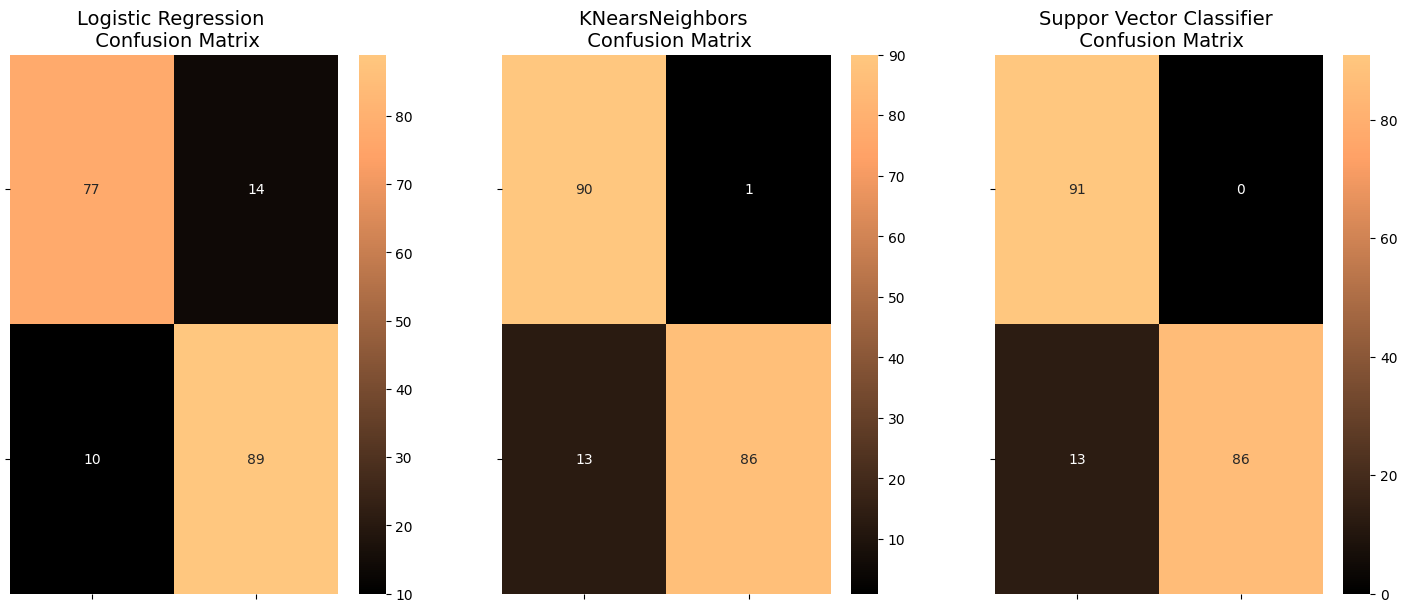

In [61]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg.predict(X_test) # xài gridsearch
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)

print(X_test.shape[0])
print(y_pred_log_reg.shape[0])

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots(1, 3,figsize=(18,7))

sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[2], annot=True, cmap=plt.cm.copper)
ax[2].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[2].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()


- góc trái trên cùng: TP
- góc phải trên cùng: FN
- góc trái dưới cùng: FP
- góc phải dưới cùng: TN

---

Precision trả lời cho câu hỏi trong các trường hợp được dự báo là positive thì có bao nhiêu trường hợp là đúng?
- Precision càng cao thì model càng tốt trong phân loại nhóm positive
- Công thức: TP/(TP+FP)

<h1>Presicion:</h1>

Logistic Regression:

- Lớp 0: 0.9
- Lớp 1: 0.81

KNN:
- Lớp 0: 0.85
- Lớp 1: 0.99

SVM:
- Lớp 0: 0.85
- Lớp 1: 0.99




=> Logistic Regression dự đoán tốt ở lớp 0, dự đoán là positive thì có ~~ 0.9 là đúng và dự đoán là negative thì có ~~ 0.81

=> KNN và SVM dự đoán tốt ở lớp 1

---

- Recall đo lường tỷ lệ dự báo chính xác các trường hợp positive trên toàn bộ các mẫu thuộc nhóm positive
- Công thức: TP/(TP+FN)

<h1>Recall:</h1>

Logistic Regression:

- Lớp 0: 0.73
- Lớp 1: 0.93

KNN:

- Lớp 0: 0.99
- Lớp 1: 0.86

SVM:
- Lớp 0: 0.99
- Lớp 1: 0.86


=> Logistic Regression dự đoán tốt ở lớp 1, có tỷ lệ dự đoán chính xác các trường hợp positive trên toàn bộ các mẫu thuộc nhóm positive là 0.73

=> KNN và SVM dự đoán tốt ở lớp 0

---

F1 - Score:
- Trung bình điều hòa giữa precision và recall. Do nó đại diện hơn trong việc đánh giá độ chính xác trên đồng thời precision và recall
- Công thức: 2/[(precision^-1) + (recall^-1)]

Logistic Regression:
- Lớp 0: 0.8
- Lớp 1: 0.87

KNN:
- Lớp 0: 0.91
- Lớp 1: 0.92

SVM:
- Lớp 0: 0.91
- Lớp 1: 0.92

F1 - Score có đánh giá xác thực hơn so với việc quá lạc quan vào mô hình khi chỉ nhìn vào precision và quá bi quan nếu chỉ dựa trên recall

In [62]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        91
           1       0.86      0.90      0.88        99

    accuracy                           0.87       190
   macro avg       0.87      0.87      0.87       190
weighted avg       0.87      0.87      0.87       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        91
           1       0.99      0.87      0.92        99

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        91
           1       1.00      0.87      0.93        99

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
weighted

Recall (độ bao phủ): đo lường tỷ lệ dự báo chính xác các trường hợp positive trên toàn bộ các mẫu thuộc nhóm positive: TP/TP+FN

recall xét theo bên phải TP, FN

Confusion Matrix:

- Positive/Negative: Type of Class (label) ["No", "Yes"]
True/False: Đúng hoặc Sai được phân loại bởi model.

- True Negatives (Hình vuông góc trái trên cùng): Số lần phân loại đúng đối với trường hợp Sai.

- False Negatives (Hình vuông góc phải trên cùng): Số lần phân loại sai đối với trường hợp Sai.

- False Positives (Hình vuông góc trái dưới cùng): Số lần phân loại sai đối với trường hợp Đúng.

- True Positives (Hình vuông góc phải dưới cùng): Số lần phân loại đúng đối với trường hợp Đúng.

190 -> 20% của 950


Logistic Regresion
- TN: ~~ 35% - 40% (số lượng dữ liệu dự đoán không gian lận trong 190)
- FN: ~~ 10% - 20% (số lượng dữ liệu dự đoán sai trong không gian lận trong 190)
- FP: ~~ 3% - 5% (số lượng dữ liệu dự đoán sai trong gian lận)
- TP: ~~ 45% - 50% (số lượng dữ liệu dữ đoán đúng trong gian lận)


KNN
- TN: ~~ 40% - 50% (số lượng dữ liệu dự đoán không gian lận trong 190)
- FN: ~~ 0.5% - 1% (số lượng dữ liệu dự đoán sai trong không gian lận trong 190)
- FP: ~~ 5% - 10% (số lượng dữ liệu dự đoán sai trong gian lận)
- TP: ~~ 42% (số lượng dữ liệu dữ đoán đúng trong gian lận)

SVM
- TN: ~~ 49% - 50% (số lượng dữ liệu dự đoán không gian lận trong 190)
- FN: ~~ 0.5% - 2% (số lượng dữ liệu dự đoán sai trong không gian lận trong 190)
- FP: ~~ 5% - 10% (số lượng dữ liệu dự đoán sai trong gian lận)
- TP: ~~ 40% - 45% (số lượng dữ liệu dữ đoán đúng trong gian lận)

**Vậy qua ma trận nhầm lận giữa các mô hình thì:**

Logistic Regression:
- FN: có số lượng dữ liệu dự đoán sai trong không gian lận cao hơn các mô hình còn lại
- FP: số lượng dữ liệu dự đoán sai trong gian lận thấp nhất

KNN:
- FN: có số lượng dữ liệu dự đoán sai trong không gian lận thấp nhất
- FP: số lượng dữ liệu dự đoán sai trong gian lận khá tương đương với SVM


SVM:
- FN: có số lượng dữ liệu dự đoán sai trong không gian lận cao hơn KNN một chút
- FP: số lượng dữ liệu dự đoán sai trong gian lận khá tương đương với KNN


- Logistic Regression có khả năng học tập tốt đối với các trường hợp gian lận tốt hơn các mô hình còn lại
- KNN và SVM có khả năng học tập tốt đối với các trường hợp không gian lận tốt hơn Logistic Regression

Đánh giá qua Accuracy là không đủ cho tập dữ liệu này vì đây là một tập dữ liệu mất cân bằng và có nhiều giá trị outlier nên chúng ta sẽ đánh giá qua các giá trị đánh giá khác như là: recall, precision, f1-score và roc

---

<h1>Positive

Logistic Regression:
- Dựa trên precision thì giá trị precision = 0.90 cho thấy đây là 1 model tốt
- Trong 84 trường hợp positive thì mô hình nhận diện được đúng 61 trường hợp nên xét theo recall = 0.73 thì đây là một mô hình khá tốt
- F1 - Score = 0.80 thì cho thấy mô hình khá tốt

KNN:
- Dựa trên precision thì giá trị precision = 0.85 cho thấy đây là 1 model tốt
- Trong 84 trường hợp positive thì mô hình nhận diện được đúng 83 trường hợp nên xét theo recall = 0.99 thì đây là một mô hình rất tốt
- F1 - Score = 0.91 thì cho thấy mô hình rất tốt

SVM:
- Dựa trên precision thì giá trị precision = 0.85 cho thấy đây là 1 model tốt
- Trong 84 trường hợp positive thì mô hình nhận diện được đúng 83 trường hợp nên xét theo recall = 0.99 thì đây là một mô hình rất tốt
- F1 - Score = 0.91 thì cho thấy mô hình rất tốt


---

<h1>Negative

Logistic Regression:
- Dựa trên precision thì giá trị precision = 0.93 cho thấy đây là 1 model tốt
- Trong 105 trường hợp positive thì mô hình nhận diện được đúng 98 trường hợp nên xét theo recall = 0.73 thì đây là một mô hình khá tốt
- F1 - Score = 0.87 thì cho thấy mô hình khá tốt

KNN:
- Dựa trên precision thì giá trị precision = 0.99 cho thấy đây là 1 model tốt
- Trong 105 trường hợp positive thì mô hình nhận diện được đúng 90 trường hợp nên xét theo recall = 0.86 thì đây là một mô hình rất tốt
- F1 - Score = 0.91 thì cho thấy mô hình rất tốt

SVM:
- Dựa trên precision thì giá trị precision = 0.99 cho thấy đây là 1 model tốt
- Trong 105 trường hợp positive thì mô hình nhận diện được đúng 90 trường hợp nên xét theo recall = 0.99 thì đây là một mô hình rất tốt
- F1 - Score = 0.91 thì cho thấy mô hình rất tốt

**Vậy mô hình KNN và SVM là tốt nhất để huấn luyện cho tập dữ liệu này**